# Exploring the Seaborn flights dataset.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

Let's examine the dataset.

In [2]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Let's plot a time series of passengers over the years.

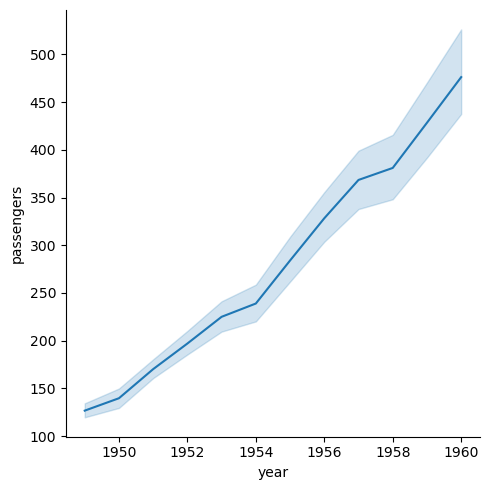

In [3]:
sns.relplot(x="year",y="passengers",kind="line",data=flights)

It just keeps going up! Let's plot the trend line as a regression.

<Axes: xlabel='year', ylabel='passengers'>

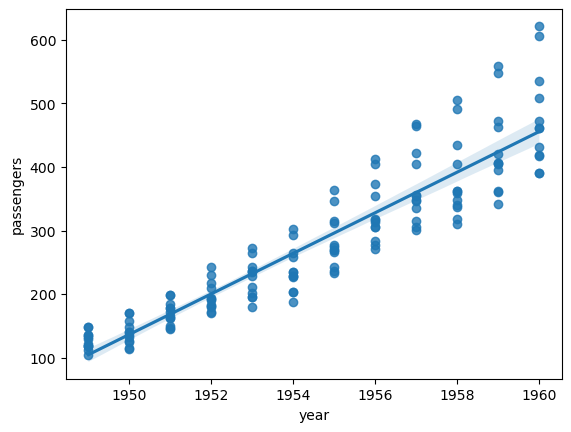

In [4]:
sns.regplot(x="year",y="passengers",data=flights)

Let's find the equation for this line.

In [4]:
import pingouin as pg 
model = pg.linear_regression(flights['year'],flights['passengers'])
model.round(2)
                        

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-62115.06,2201.68,-28.21,0.0,0.85,0.85,-66467.38,-57762.75
1,year,31.92,1.13,28.34,0.0,0.85,0.85,29.70,34.15


Seems to be quite a strong correlation with a high R-squared number and the p-values of the constant and coefficient both 0. The equation is: $$y = -62115.06 + 31.92x$$

Let's find the percentage growth of passengers from 1959 to 1960.

In [8]:
flights_1959 = flights.loc[flights["year"] == 1959,"passengers"].sum()
flights_1960 = flights.loc[flights["year"] == 1960,"passengers"].sum()
(flights_1960 - flights_1959) / flights_1959

np.float64(0.11167315175097277)

So approximately 11 percent.

In [ ]:
flights.loc[flights["year"] == 1960,"passengers"].tail()

And the previous two years:

In [ ]:
flights_1958 = flights.loc[flights["year"] == 1958,"passengers"].sum()
flights_1959 = flights.loc[flights["year"] == 1959,"passengers"].sum()
(flights_1959 - flights_1958) / flights_1958

So a pretty steady increase, similar to the graphs.